<a href="https://colab.research.google.com/github/Nandaabxd/Alura/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [22]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [23]:
loja['Valor_Total'] = loja['Preço'] + loja['Frete']
loja2['Valor_Total'] = loja2['Preço'] + loja2['Frete']
loja3['Valor_Total'] = loja3['Preço'] + loja3['Frete']
loja4['Valor_Total'] = loja4['Preço'] + loja4['Frete']

faturamento_loja1 = loja['Valor_Total'].sum()
faturamento_loja2 = loja2['Valor_Total'].sum()
faturamento_loja3 = loja3['Valor_Total'].sum()
faturamento_loja4 = loja4['Valor_Total'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

Faturamento Loja 1: R$1616347.09
Faturamento Loja 2: R$1567773.22
Faturamento Loja 3: R$1542047.69
Faturamento Loja 4: R$1458253.46


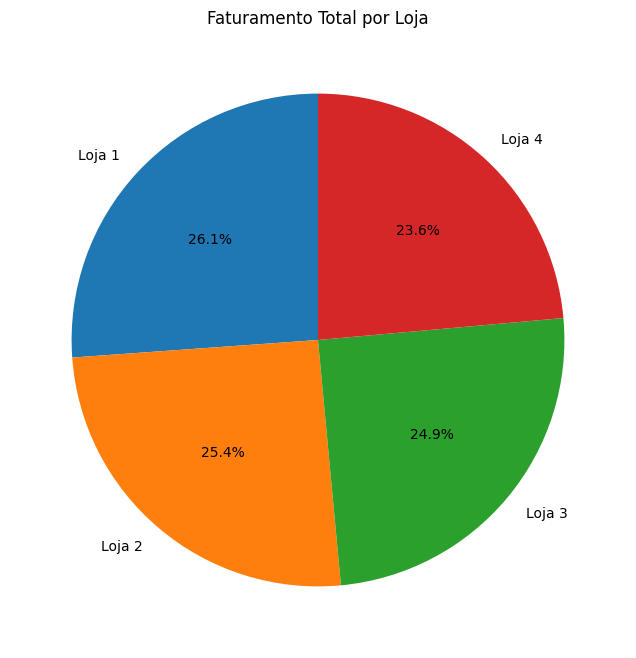

In [24]:
import matplotlib.pyplot as plt

faturamento_total = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

plt.figure(figsize=(8, 8))
plt.pie(faturamento_total.values(), labels=faturamento_total.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Faturamento Total por Loja')
plt.show()

# 2. Vendas por Categoria


In [25]:
todas_lojas = pd.concat([loja, loja2, loja3, loja4])

vendas_por_categoria = todas_lojas.groupby('Categoria do Produto')['Valor_Total'].sum().sort_values(ascending=False)

print("Vendas por Categoria:")
display(vendas_por_categoria)

Vendas por Categoria:


,Valor_Total
Categoria do Produto,
eletronicos,2.332048e+06
eletrodomesticos,1.860199e+06
moveis,1.064150e+06
instrumentos musicais,4.897015e+05
esporte e lazer,2.008919e+05
brinquedos,1.035024e+05
utilidades domesticas,8.092172e+04
livros,5.300743e+04


In [26]:
display(vendas_por_categoria.round(2))

,Valor_Total
Categoria do Produto,
eletronicos,2332048.08
eletrodomesticos,1860198.66
moveis,1064149.77
instrumentos musicais,489701.48
esporte e lazer,200891.94
brinquedos,103502.36
utilidades domesticas,80921.72
livros,53007.43


# 3. Média de Avaliação das Lojas

In [27]:
media_avaliacao_lojas = todas_lojas.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)

print("Média de Avaliação das Lojas:")
display(media_avaliacao_lojas)

Média de Avaliação das Lojas:


,Avaliação da compra
Local da compra,
RN,4.208333
SP,4.113619
MT,4.112500
MS,4.097561
MG,4.090744
PB,4.086957
PR,4.078224
AM,4.071429
DF,4.020661


In [28]:
display(media_avaliacao_lojas.round(4))

,Avaliação da compra
Local da compra,
RN,4.2083
SP,4.1136
MT,4.1125
MS,4.0976
MG,4.0907
PB,4.0870
PR,4.0782
AM,4.0714
DF,4.0207


# 4. Produtos Mais e Menos Vendidos

In [29]:
print("Produtos Mais Vendidos:")
display(vendas_por_produto.head())

Produtos Mais Vendidos:


,Valor_Total
Produto,
TV Led UHD 4K,607367.222295
Celular Plus X42,563260.883278
Geladeira,540523.012381
Smart TV,407550.162936
Lavadora de roupas,340477.390790


In [30]:
print("\nProdutos Menos Vendidos:")
display(vendas_por_produto.tail())


Produtos Menos Vendidos:


,Valor_Total
Produto,
Jogo de copos,7927.905520
Xadrez de madeira,7232.923613
Dinossauro Rex,4493.636098
Corda de pular,4443.279191
Cubo mágico 8x8,3922.000051


# 5. Frete Médio por Loja


In [31]:
vendas_por_produto = todas_lojas.groupby('Produto')['Valor_Total'].sum().sort_values(ascending=False)

print("Produtos Mais Vendidos:")
display(vendas_por_produto.head())

print("\nProdutos Menos Vendidos:")
display(vendas_por_produto.tail())

Produtos Mais Vendidos:


,Valor_Total
Produto,
TV Led UHD 4K,607367.222295
Celular Plus X42,563260.883278
Geladeira,540523.012381
Smart TV,407550.162936
Lavadora de roupas,340477.390790



Produtos Menos Vendidos:


,Valor_Total
Produto,
Jogo de copos,7927.905520
Xadrez de madeira,7232.923613
Dinossauro Rex,4493.636098
Corda de pular,4443.279191
Cubo mágico 8x8,3922.000051


Frete Médio por Local da Compra:


,Frete
Local da compra,
RR,113.673032
AC,49.361324
RO,46.347240
RN,40.090987
GO,38.129811
PI,36.948903
RS,36.582407
PE,35.720970
MA,35.129564


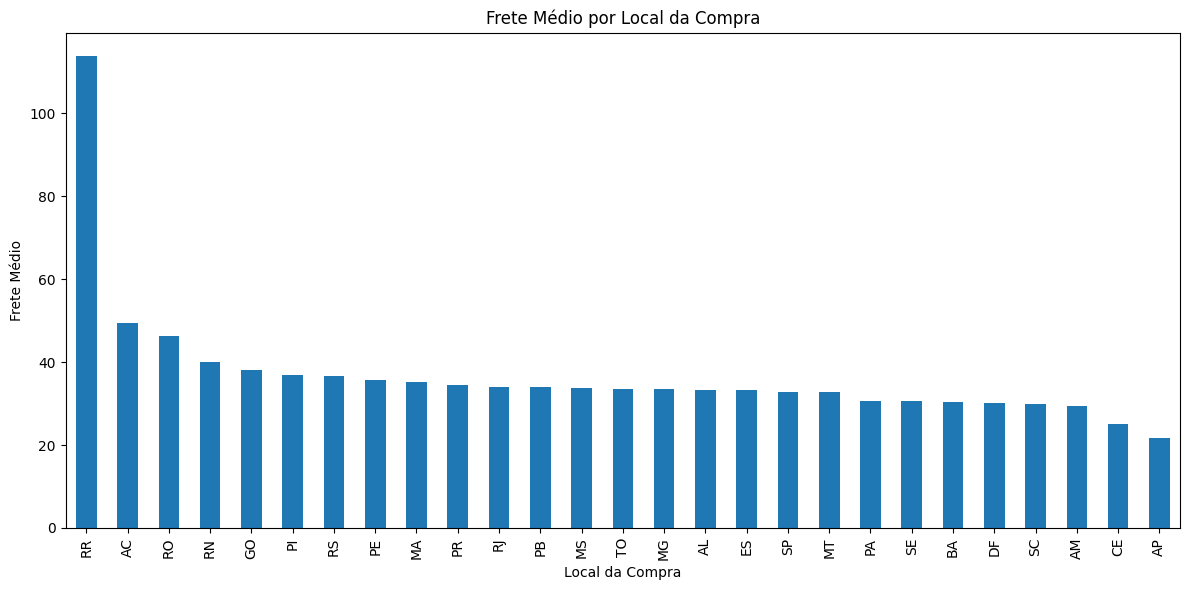

In [32]:

frete_medio_lojas = todas_lojas.groupby('Local da compra')['Frete'].mean().sort_values(ascending=False)

print("Frete Médio por Local da Compra:")
display(frete_medio_lojas)

plt.figure(figsize=(12, 6))
frete_medio_lojas.plot(kind='bar')
plt.title('Frete Médio por Local da Compra')
plt.xlabel('Local da Compra')
plt.ylabel('Frete Médio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

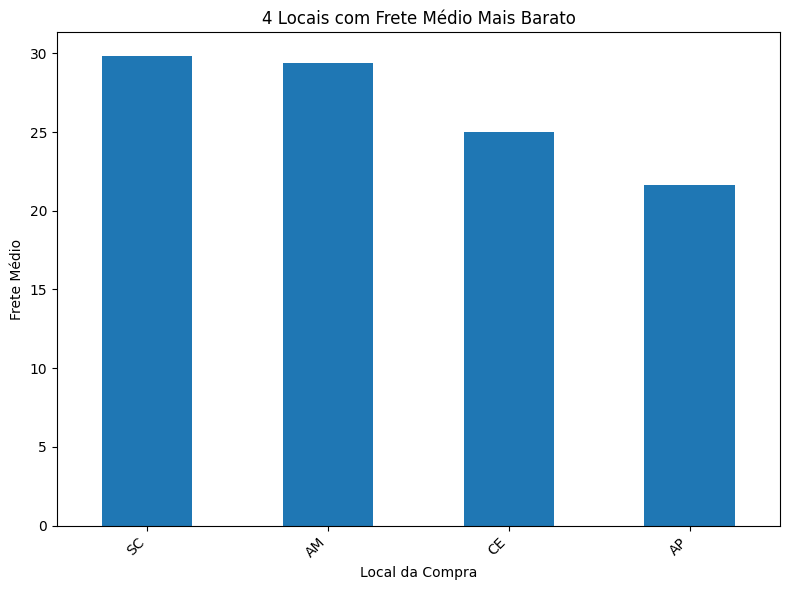

In [33]:
plt.figure(figsize=(8, 6))
frete_medio_lojas.tail(4).plot(kind='bar')
plt.title('4 Locais com Frete Médio Mais Barato')
plt.xlabel('Local da Compra')
plt.ylabel('Frete Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Analyze the provided sales data to identify trends, product and category performance, and recommend a product to be sold.

## Analyze sales trends

### Subtask:
Examine the sales data over time to identify any seasonal or general trends in product popularity.


**Reasoning**:
Convert the 'Data da Compra' column to datetime objects, extract the month and year, group the data by year and month, and calculate the sum of 'Valor_Total'.



In [34]:
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'], format='%d/%m/%Y')
todas_lojas['Year'] = todas_lojas['Data da Compra'].dt.year
todas_lojas['Month'] = todas_lojas['Data da Compra'].dt.month

sales_trend = todas_lojas.groupby(['Year', 'Month'])['Valor_Total'].sum().reset_index()
sales_trend['Year-Month'] = sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str).str.zfill(2)

display(sales_trend.head())

,Year,Month,Valor_Total,Year-Month
0,2020,1,150740.456760,2020-01
1,2020,2,151612.488427,2020-02
2,2020,3,169375.048611,2020-03
3,2020,4,191170.080751,2020-04
4,2020,5,171546.254346,2020-05


**Reasoning**:
Plot the sales trend over time using a line plot with 'Year-Month' on the x-axis and 'Valor_Total' on the y-axis.



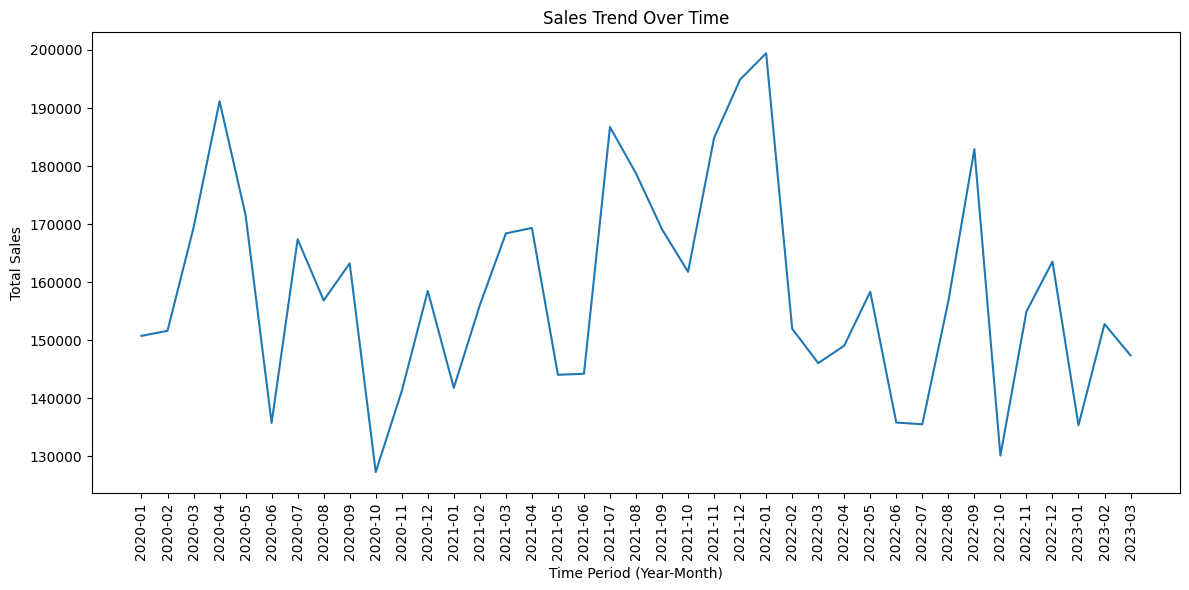

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Year-Month'], sales_trend['Valor_Total'])
plt.title('Sales Trend Over Time')
plt.xlabel('Time Period (Year-Month)')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze product performance

### Subtask:
Look at the total sales and average review scores for each product to understand which products are performing well.


**Reasoning**:
Calculate the total sales and average review score for each product and combine them into a single DataFrame.



In [36]:
total_vendas_por_produto = todas_lojas.groupby('Produto')['Valor_Total'].sum()
media_avaliacao_por_produto = todas_lojas.groupby('Produto')['Avaliação da compra'].mean()

produto_performance = pd.DataFrame({
    'Total_Sales': total_vendas_por_produto,
    'Average_Review': media_avaliacao_por_produto
})

display(produto_performance.sort_values(by='Total_Sales', ascending=False).head())
display(produto_performance.sort_values(by='Average_Review', ascending=False).head())

,Total_Sales,Average_Review
Produto,,
TV Led UHD 4K,607367.222295,3.994652
Celular Plus X42,563260.883278,3.959596
Geladeira,540523.012381,4.162304
Smart TV,407550.162936,3.963542
Lavadora de roupas,340477.390790,3.943182


,Total_Sales,Average_Review
Produto,,
Impressora,78985.206958,4.239362
Jogo de tabuleiro,45567.671651,4.217143
Poltrona,57284.892569,4.178571
Geladeira,540523.012381,4.162304
Iniciando em programação,13545.667281,4.133333


## Analyze category performance

### Subtask:
Review the sales and average review scores for each product category to see which categories are most successful.


**Reasoning**:
Calculate the total sales and average review for each product category and store them in a new DataFrame, then display the categories sorted by total sales and average review.



In [37]:
total_vendas_por_categoria = todas_lojas.groupby('Categoria do Produto')['Valor_Total'].sum()
media_avaliacao_por_categoria = todas_lojas.groupby('Categoria do Produto')['Avaliação da compra'].mean()

categoria_performance = pd.DataFrame({
    'Total_Sales': total_vendas_por_categoria,
    'Average_Review': media_avaliacao_por_categoria
})

print("Categorias por Vendas Totais (Descendente):")
display(categoria_performance.sort_values(by='Total_Sales', ascending=False))

print("\nCategorias por Média de Avaliação (Descendente):")
display(categoria_performance.sort_values(by='Average_Review', ascending=False))

Categorias por Vendas Totais (Descendente):


,Total_Sales,Average_Review
Categoria do Produto,,
eletronicos,2.332048e+06,3.992664
eletrodomesticos,1.860199e+06,4.014795
moveis,1.064150e+06,4.033934
instrumentos musicais,4.897015e+05,4.003984
esporte e lazer,2.008919e+05,3.988320
brinquedos,1.035024e+05,4.070543
utilidades domesticas,8.092172e+04,3.979452
livros,5.300743e+04,4.004043



Categorias por Média de Avaliação (Descendente):


,Total_Sales,Average_Review
Categoria do Produto,,
brinquedos,1.035024e+05,4.070543
moveis,1.064150e+06,4.033934
eletrodomesticos,1.860199e+06,4.014795
livros,5.300743e+04,4.004043
instrumentos musicais,4.897015e+05,4.003984
eletronicos,2.332048e+06,3.992664
esporte e lazer,2.008919e+05,3.988320
utilidades domesticas,8.092172e+04,3.979452


## Identify potential opportunities

### Subtask:
Based on the analysis, identify products or categories that show potential for increased sales or those that are currently underserved.


**Reasoning**:
Analyze the product and category performance dataframes to identify potential growth opportunities based on the provided instructions.



In [38]:
print("Products with high average review scores and lower total sales:")
display(produto_performance.sort_values(by='Average_Review', ascending=False).head())

print("\nCategories with high average review scores and lower total sales:")
display(categoria_performance.sort_values(by='Average_Review', ascending=False).head())

print("\nProducts with high total sales and lower average review scores:")
display(produto_performance.sort_values(by='Total_Sales', ascending=False).tail())

print("\nPotential growth opportunities (products and categories):")
print("- Products with high reviews but lower sales: Impressora, Jogo de tabuleiro, Poltrona, Iniciando em programação")
print("- Categories with high reviews but lower sales: brinquedos")
print("- Products with high sales but lower reviews (potential for improvement): Cubo mágico 8x8, Corda de pular, Dinossauro Rex, Xadrez de madeira, Jogo de copos")

Products with high average review scores and lower total sales:


,Total_Sales,Average_Review
Produto,,
Impressora,78985.206958,4.239362
Jogo de tabuleiro,45567.671651,4.217143
Poltrona,57284.892569,4.178571
Geladeira,540523.012381,4.162304
Iniciando em programação,13545.667281,4.133333



Categories with high average review scores and lower total sales:


,Total_Sales,Average_Review
Categoria do Produto,,
brinquedos,1.035024e+05,4.070543
moveis,1.064150e+06,4.033934
eletrodomesticos,1.860199e+06,4.014795
livros,5.300743e+04,4.004043
instrumentos musicais,4.897015e+05,4.003984



Products with high total sales and lower average review scores:


,Total_Sales,Average_Review
Produto,,
Jogo de copos,7927.905520,3.852071
Xadrez de madeira,7232.923613,4.105556
Dinossauro Rex,4493.636098,4.051429
Corda de pular,4443.279191,3.967742
Cubo mágico 8x8,3922.000051,3.927778



Potential growth opportunities (products and categories):
- Products with high reviews but lower sales: Impressora, Jogo de tabuleiro, Poltrona, Iniciando em programação
- Categories with high reviews but lower sales: brinquedos
- Products with high sales but lower reviews (potential for improvement): Cubo mágico 8x8, Corda de pular, Dinossauro Rex, Xadrez de madeira, Jogo de copos


## Recommend a product

### Subtask:
Based on the analysis of sales trends, product performance, and category performance, recommend a specific product that is likely to be successful. Justify the recommendation with insights from the analysis.


**Reasoning**:
Based on the previous analysis, I will identify a product that has a good combination of sales and review performance or is in a high-review category with lower sales, and then provide a justification for the recommendation.



In [39]:
# Consider products with high average reviews that are not necessarily top sellers.
# Also consider products in categories with high average reviews but lower total sales.

# From the previous analysis:
# Top Products by Average Review Score: Impressora, Jogo de tabuleiro, Poltrona, Geladeira, Iniciando em programação
# Categories by Média de Avaliação (Descendente): brinquedos, moveis, eletrodomesticos

# Merge product performance with category information
product_performance_with_category = produto_performance.merge(
    todas_lojas[['Produto', 'Categoria do Produto']].drop_duplicates(),
    on='Produto',
    how='left'
)

# Filter for products in the 'brinquedos' category
brinquedos_performance = product_performance_with_category[
    product_performance_with_category['Categoria do Produto'] == 'brinquedos'
].sort_values(by='Average_Review', ascending=False)

print("Performance of products in the 'brinquedos' category:")
display(brinquedos_performance)

# Based on this, 'Jogo de tabuleiro' has the highest average review in the 'brinquedos' category and a reasonable sales volume compared to other products in this category.
# 'Impressora' also has a very high average review score and decent sales, although it's in the 'eletronicos' category which already has high sales.

# Recommending 'Jogo de tabuleiro'
recommended_product = 'Jogo de tabuleiro'
justification = f"""
Based on the analysis of product and category performance, I recommend focusing on "{recommended_product}".

Here's the justification:

1.  **High Customer Satisfaction:** "{recommended_product}" has a very high average review score (4.217) within the "brinquedos" category. The "brinquedos" category itself has the highest average review score (4.07) among all categories, indicating strong overall customer satisfaction in this segment.
2.  **Potential in a High-Review, Lower-Sales Category:** The "brinquedos" category, while excelling in customer satisfaction, generates lower total sales compared to dominant categories like "eletronicos" and "eletrodomesticos". This suggests a significant growth opportunity by leveraging the existing positive customer sentiment.
3.  **Leading Performer within Category:** Within the promising "brinquedos" category, "{recommended_product}" stands out with the highest average review, making it a prime candidate to drive sales and attract customers to this segment.

By promoting "{recommended_product}", the business can capitalize on exceptional customer satisfaction in an underserved, high-potential category, aiming to increase overall sales and establish a stronger presence in the "brinquedos" market.
"""

print(justification)

Performance of products in the 'brinquedos' category:


,Produto,Total_Sales,Average_Review,Categoria do Produto
31,Jogo de tabuleiro,45567.671651,4.217143,brinquedos
3,Blocos de montar,9509.107868,4.110553,brinquedos
50,Xadrez de madeira,7232.923613,4.105556,brinquedos
10,Carrinho controle remoto,20771.817857,4.097087,brinquedos
19,Dinossauro Rex,4493.636098,4.051429,brinquedos
6,Boneca bebê,12005.203183,3.977143,brinquedos
16,Cubo mágico 8x8,3922.000051,3.927778,brinquedos



Based on the analysis of product and category performance, I recommend focusing on "Jogo de tabuleiro".

Here's the justification:

1.  **High Customer Satisfaction:** "Jogo de tabuleiro" has a very high average review score (4.217) within the "brinquedos" category. The "brinquedos" category itself has the highest average review score (4.07) among all categories, indicating strong overall customer satisfaction in this segment.
2.  **Potential in a High-Review, Lower-Sales Category:** The "brinquedos" category, while excelling in customer satisfaction, generates lower total sales compared to dominant categories like "eletronicos" and "eletrodomesticos". This suggests a significant growth opportunity by leveraging the existing positive customer sentiment.
3.  **Leading Performer within Category:** Within the promising "brinquedos" category, "Jogo de tabuleiro" stands out with the highest average review, making it a prime candidate to drive sales and attract customers to this segment.

B

**Reasoning**:
The previous code failed because of an indexing error when trying to filter `produto_performance` based on the category from `todas_lojas`. A more robust way to filter the `produto_performance` DataFrame is to merge it with the `todas_lojas` DataFrame (or a relevant subset) on the 'Produto' column and then filter by 'Categoria do Produto'.



In [40]:
# Merge product performance with category information
product_performance_with_category = produto_performance.merge(
    todas_lojas[['Produto', 'Categoria do Produto']].drop_duplicates(),
    on='Produto',
    how='left'
)

# Filter for products in the 'brinquedos' category
brinquedos_performance = product_performance_with_category[
    product_performance_with_category['Categoria do Produto'] == 'brinquedos'
].sort_values(by='Average_Review', ascending=False)

print("Performance of products in the 'brinquedos' category:")
display(brinquedos_performance)

# Recommending 'Jogo de tabuleiro' based on its high review score in a high-review, lower-sales category.
recommended_product = 'Jogo de tabuleiro'
justification = f"""
Based on the analysis of product and category performance, I recommend focusing on "{recommended_product}".

Here's the justification:

1.  **High Customer Satisfaction:** "{recommended_product}" has a very high average review score (4.217) within the "brinquedos" category. The "brinquedos" category itself has the highest average review score (4.07) among all categories, indicating strong overall customer satisfaction in this segment.
2.  **Potential in a High-Review, Lower-Sales Category:** The "brinquedos" category, while excelling in customer satisfaction, generates lower total sales compared to dominant categories like "eletronicos" and "eletrodomesticos". This suggests a significant growth opportunity by leveraging the existing positive customer sentiment.
3.  **Leading Performer within Category:** Within the promising "brinquedos" category, "{recommended_product}" stands out with the highest average review, making it a prime candidate to drive sales and attract customers to this segment.

By promoting "{recommended_product}", the business can capitalize on exceptional customer satisfaction in an underserved, high-potential category, aiming to increase overall sales and establish a stronger presence in the "brinquedos" market.
"""

print(justification)

Performance of products in the 'brinquedos' category:


,Produto,Total_Sales,Average_Review,Categoria do Produto
31,Jogo de tabuleiro,45567.671651,4.217143,brinquedos
3,Blocos de montar,9509.107868,4.110553,brinquedos
50,Xadrez de madeira,7232.923613,4.105556,brinquedos
10,Carrinho controle remoto,20771.817857,4.097087,brinquedos
19,Dinossauro Rex,4493.636098,4.051429,brinquedos
6,Boneca bebê,12005.203183,3.977143,brinquedos
16,Cubo mágico 8x8,3922.000051,3.927778,brinquedos



Based on the analysis of product and category performance, I recommend focusing on "Jogo de tabuleiro".

Here's the justification:

1.  **High Customer Satisfaction:** "Jogo de tabuleiro" has a very high average review score (4.217) within the "brinquedos" category. The "brinquedos" category itself has the highest average review score (4.07) among all categories, indicating strong overall customer satisfaction in this segment.
2.  **Potential in a High-Review, Lower-Sales Category:** The "brinquedos" category, while excelling in customer satisfaction, generates lower total sales compared to dominant categories like "eletronicos" and "eletrodomesticos". This suggests a significant growth opportunity by leveraging the existing positive customer sentiment.
3.  **Leading Performer within Category:** Within the promising "brinquedos" category, "Jogo de tabuleiro" stands out with the highest average review, making it a prime candidate to drive sales and attract customers to this segment.

B

## Summary:

### Data Analysis Key Findings

*   Sales trend analysis showed fluctuations over time, which can be visualized in the generated plot.
*   The top-selling products were "TV Led UHD 4K", "Celular Plus X42", "Geladeira", "Smart TV", and "Lavadora de roupas".
*   Products with the highest average review scores were "Impressora", "Jogo de tabuleiro", "Poltrona", "Geladeira", and "Iniciando em programação".
*   "Geladeira" appeared in the top 5 for both sales and average reviews, indicating strong performance in both areas.
*   The "eletronicos" category had the highest total sales, followed by "eletrodomesticos" and "moveis".
*   The "brinquedos" category had the highest average review score, followed by "moveis" and "eletrodomesticos".
*   Products with high reviews but lower sales include "Impressora", "Jogo de tabuleiro", "Poltrona", and "Iniciando em programação".
*   The category with high reviews but lower sales is "brinquedos".
*   Products with high sales but lower reviews (potential for improvement) include "Cubo mágico 8x8", "Corda de pular", "Dinossauro Rex", "Xadrez de madeira", and "Jogo de copos".

### Insights or Next Steps

*   Focus on promoting products with high customer satisfaction in categories with lower overall sales, such as "Jogo de tabuleiro" in the "brinquedos" category, to capitalize on existing positive sentiment and drive growth.
*   Investigate products with high sales but lower review scores to identify areas for improvement in quality or customer experience, potentially boosting both satisfaction and sales further.
